In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import math 
from tqdm import tqdm
from random import random 
#import cv2 as cv

In [3]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [3]:
sns.color_palette("magma")

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [4]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [5]:
#sex balance 
sex = {}
for s in df["sex"]:
    if s not in sex:
        sex[s] = 0 
    sex[s] += 1
sex

{'male': 5406, 'female': 4552, 'unknown': 57}

In [6]:
c = 0 
balance = {}
for d in df["dx"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
    c += 1
print(c)
balance

10015


{'bkl': 1099,
 'nv': 6705,
 'df': 115,
 'mel': 1113,
 'vasc': 142,
 'bcc': 514,
 'akiec': 327}

In [7]:
dx  = []
nums = []
for d in balance:
    dx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["dx"] = dx
df["nums"] = nums


In [8]:
df["perc"] = round(df["nums"]/sum(df["nums"])*100)
df = df.sort_values("nums", ascending=False)
df.head()

,dx,nums,perc
1,nv,6705,67.0
3,mel,1113,11.0
0,bkl,1099,11.0
5,bcc,514,5.0
6,akiec,327,3.0


[Text(0.5, 0, '% of Dataset'),
 Text(0, 0.5, 'Skin Condition'),
 Text(0.5, 1.0, 'Categorical Imbalance in the HAM10000 Dataset')]

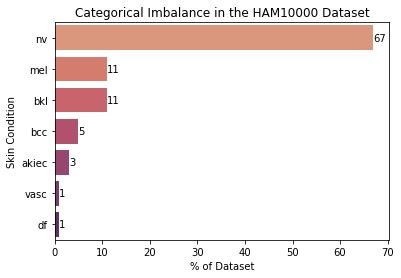

In [12]:
sns.set_palette(sns.color_palette("magma"))
#sns.set_style("white")
g = sns.barplot(x="perc", y="dx", data=df, palette = "flare")
for i in g.containers:
    g.bar_label(i,)
g.set(xlabel="% of Dataset", ylabel="Skin Condition", title = "Categorical Imbalance in the HAM10000 Dataset")
#here either add legend, or figure description for map 

Age balance - male female ages 

[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Age (years)')]

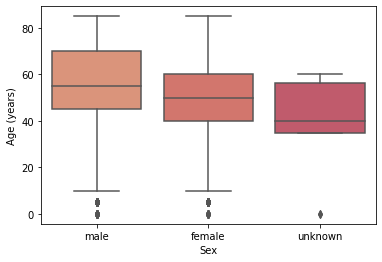

In [19]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")

g = sns.boxplot(x="sex", y="age", data=df)
g.set(xlabel="Sex", ylabel="Age (years)")

Average incidence age for dx 

[Text(0.5, 0, 'Diagnosis'), Text(0, 0.5, 'Age (years)')]

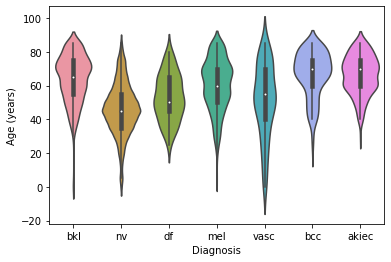

In [20]:
g = sns.violinplot(x="dx", y="age", data=df)
g.set(xlabel="Diagnosis", ylabel="Age (years)")

Localization of condition

In [14]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")

c = 0 
balance = {}
for d in df["localization"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
    c += 1
print(c)

balance = dict(sorted(balance.items(), key=lambda item: item[1], reverse=True))
balance

10015


{'back': 2192,
 'lower extremity': 2077,
 'trunk': 1404,
 'upper extremity': 1118,
 'abdomen': 1022,
 'face': 745,
 'chest': 407,
 'foot': 319,
 'unknown': 234,
 'neck': 168,
 'scalp': 128,
 'hand': 90,
 'ear': 56,
 'genital': 48,
 'acral': 7}

In [20]:
sum(balance.values())

10015

[Text(0.5, 0, '% of Samples'),
 Text(0, 0.5, 'Localization'),
 Text(0.5, 1.0, 'Location of Samples in the HAM10000 Dataset')]

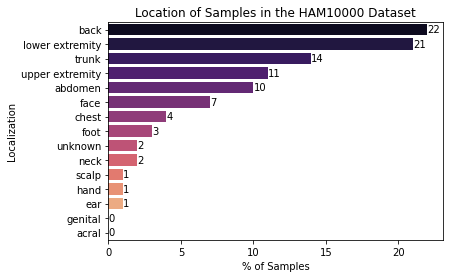

In [15]:
dx  = []
nums = []
perc = []
for d in balance:
    dx.append(d)
    nums.append(balance[d])
    percent = balance[d]/sum(balance.values())
    perc.append(round(percent*100))
df = pd.DataFrame()
df["dx"] = dx
df["nums"] = nums
df["perc"] = perc

#sns.set(font_scale=1, rc={'figure.figsize':(1.5*11.7,1.5*8.27)})
sns.color_palette("magma", as_cmap=True)
g = sns.barplot(x="perc", y="dx", data=df, palette = "magma")
for i in g.containers:
    g.bar_label(i,)
g.set(xlabel="% of Samples", ylabel="Localization", title = "Location of Samples in the HAM10000 Dataset")

Histology distrib 

In [194]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
balance = {}
for d in df["dx_type"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
balance

{'histo': 5340, 'consensus': 902, 'confocal': 69, 'follow_up': 3704}

[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Samples')]

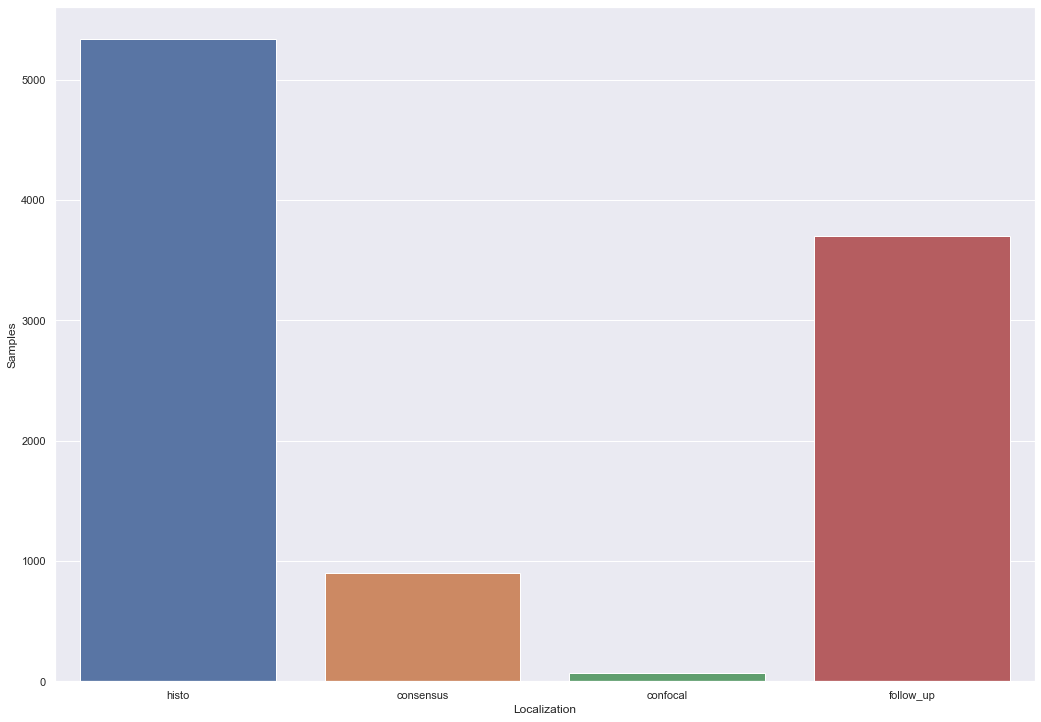

In [195]:
hx  = []
nums = []
for d in balance:
    hx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["hx"] = hx
df["nums"] = nums
g = sns.barplot(x="hx", y="nums", data=df)
g.set(xlabel="Localization", ylabel="Samples")

In [196]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Age (years)')]

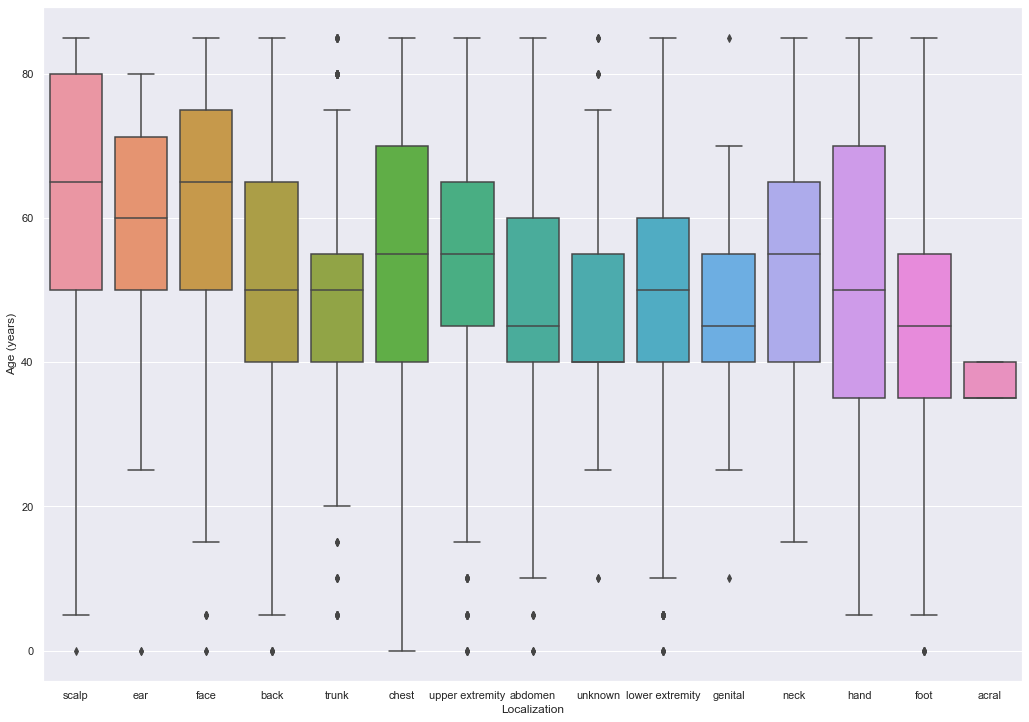

In [197]:
#age vs localization 
g = sns.boxplot(x="localization", y="age", data=df)
sns.set(font_scale=1, rc={'figure.figsize':(1.5*11.7,1.5*8.27)})
g.set(xlabel="Localization", ylabel="Age (years)")

In [198]:
#number by diagnoses by sex 
m_balance = {}
f_balance = {}
for d,s in zip(list(df["dx"]), list(df["sex"])):
    if s == "male":
        if d not in m_balance:
            m_balance[d] = 0 
        m_balance[d] += 1
    else:
        if d not in f_balance:
            f_balance[d] = 0 
        f_balance[d] += 1

In [199]:
m_balance

{'bkl': 626,
 'nv': 3421,
 'df': 63,
 'mel': 689,
 'vasc': 69,
 'bcc': 317,
 'akiec': 221}

In [200]:
ndf = pd.DataFrame()
sexes = []
dxs = []
amounts = []

for d in m_balance:
    sexes.append("male")
    dxs.append(d)
    amounts.append(m_balance[d])

for d in f_balance:
    sexes.append("female")
    dxs.append(d)
    amounts.append(f_balance[d])

ndf["sex"] = sexes
ndf["dx"] = dxs 
ndf["nums"] = amounts 
ndf

,sex,dx,nums
0,male,bkl,626
1,male,nv,3421
2,male,df,63
3,male,mel,689
4,male,vasc,69
5,male,bcc,317
6,male,akiec,221
7,female,bkl,473
8,female,df,52
9,female,nv,3284


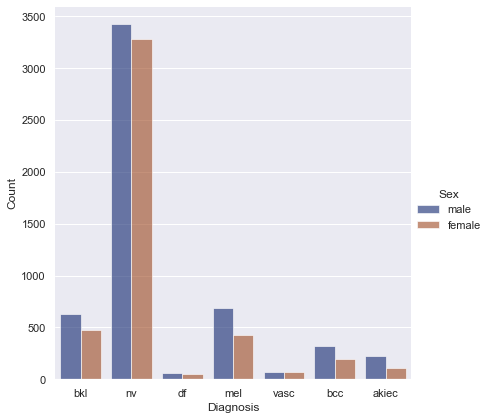

In [201]:
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="dx", y="nums", hue="sex",
     palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("Diagnosis", "Count")
    g.legend.set_title("Sex")
except:
    pass

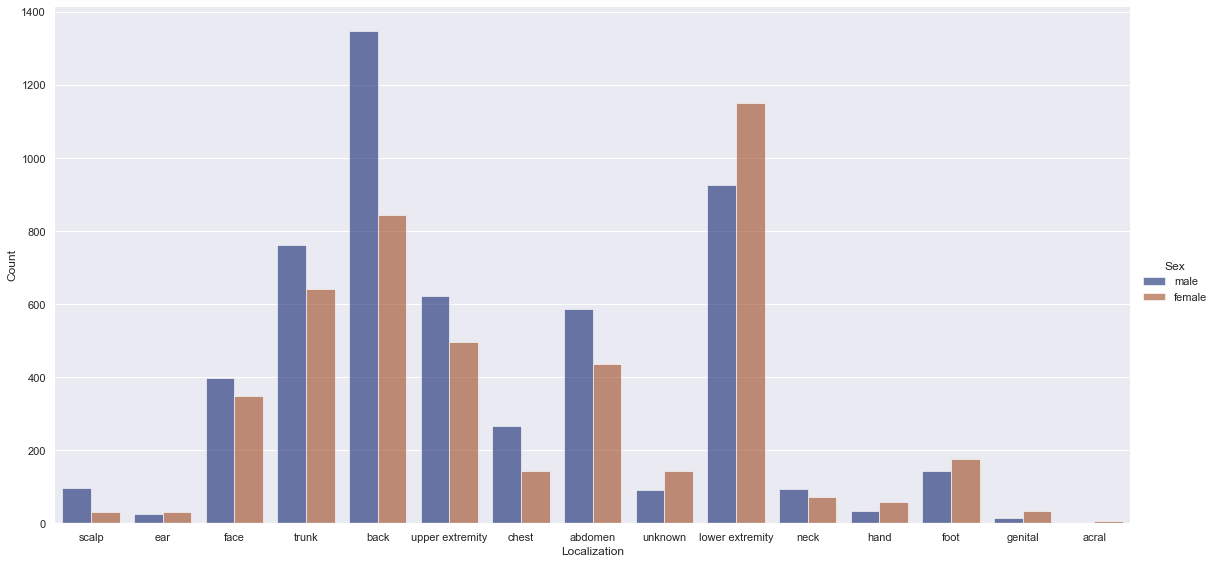

In [202]:
#number by localization by sex 
#number by diagnosis by sex 
m_balance = {}
f_balance = {}
for d,s in zip(list(df["localization"]), list(df["sex"])):
    if s == "male":
        if d not in m_balance:
            m_balance[d] = 0 
        m_balance[d] += 1
    else:
        if d not in f_balance:
            f_balance[d] = 0 
        f_balance[d] += 1
m_balance
ndf = pd.DataFrame()
sexes = []
ls = []
amounts = []

for d in m_balance:
    sexes.append("male")
    ls.append(d)
    amounts.append(m_balance[d])

for d in f_balance:
    sexes.append("female")
    ls.append(d)
    amounts.append(f_balance[d])

ndf["sex"] = sexes
ndf["localization"] = ls
ndf["nums"] = amounts 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="localization", y="nums", hue="sex",
     palette="dark", alpha=.6, height=8, aspect =2,
    )
    g.despine(left=True)
    g.set_axis_labels("Localization", "Count")
    g.legend.set_title("Sex")
except:
    pass

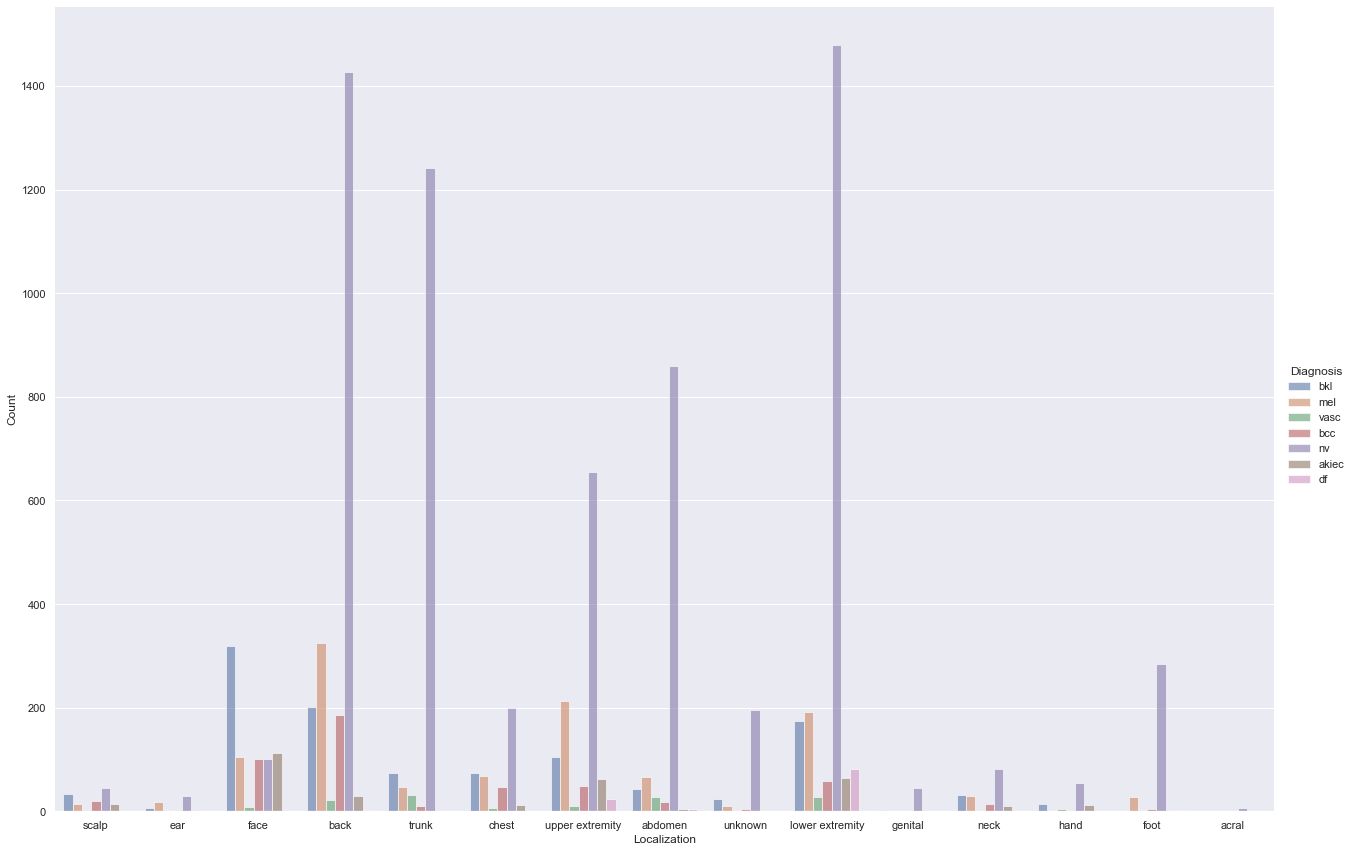

In [203]:
# localization by diagnosis type
balance = {} # balance = {location: disease: count}

for l,d in zip(list(df["localization"]), list(df["dx"])):
    if l not in balance:
        balance[l] = {}
    if d not in balance[l]:
        balance[l][d] = 0 
    balance[l][d] += 1

ls = []
dxs = []
count = []
for l in balance:
    for dx in balance[l]:
        dxs.append(dx)
        ls.append(l)
        count.append(balance[l][dx])

ndf = pd.DataFrame()
ndf["dx"] = dxs
ndf["localization"] = ls
ndf["count"] = count 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="localization", y="count", hue="dx",
      alpha=.6, height=12, aspect =1.5,
    )
    g.despine(left=True)
    g.set_axis_labels("Localization", "Count")
    g.legend.set_title("Diagnosis")
except:
    pass

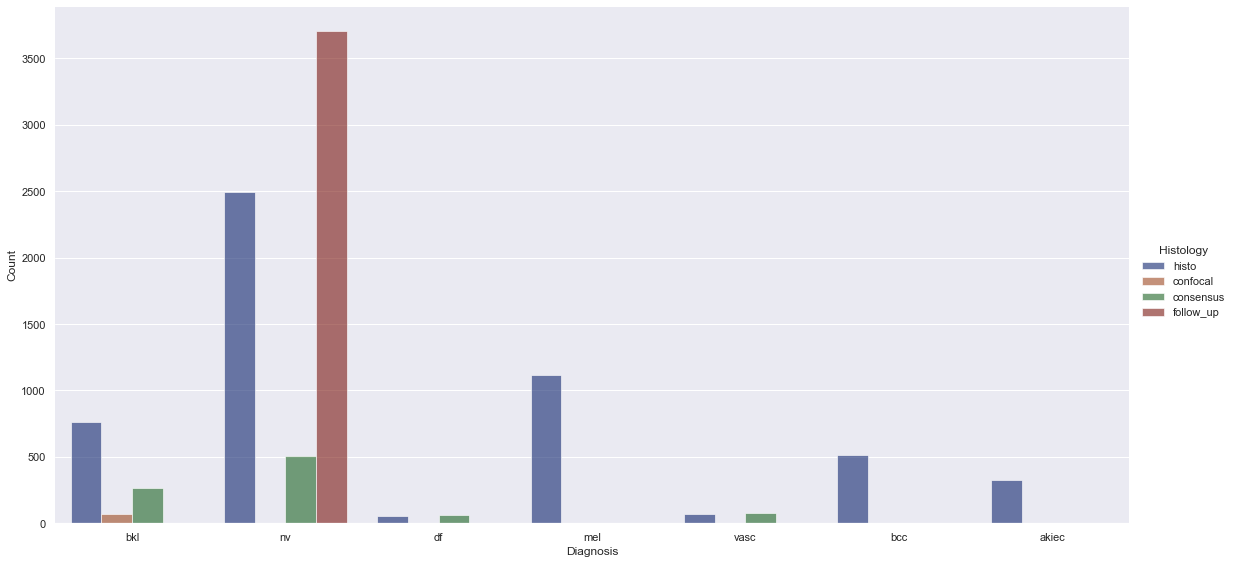

In [204]:
histo = {} # {disease: histology: count}
for d, h in zip(list(df["dx"]), list(df["dx_type"])):
    if d not in histo: 
        histo[d] = {}
    if h not in histo[d]:
        histo[d][h] = 0 
    histo[d][h] += 1 
histo

dx = []
hx = []
count = []
for d in histo:
    for h in histo[d]:
        dx.append(d)
        hx.append(h)
        count.append(histo[d][h])

ndf = pd.DataFrame()
ndf["dx"] = dx
ndf["hx"] = hx
ndf["count"] = count 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="dx", y="count", hue="hx",
     palette="dark", alpha=.6, height=8, aspect =2,
    )
    g.despine(left=True)
    g.set_axis_labels("Diagnosis", "Count")
    g.legend.set_title("Histology")
except:
    pass

Need to do localization by diagnosis type 
- segment before 
- ask Wayner how to proceed for multimodal learning
- ask Wayner how to do transfer learning 
- week 7 transfer learning 

Actual image EDA 

In [205]:
import os 
from tqdm import tqdm 
import numpy as np 
from PIL import Image


In [206]:
def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [207]:
sds = ["./HAM10000/HAM10000_images_part_1/", "./HAM10000/HAM10000_images_part_2/"]
hs = []
ws = []
for sd in sds:
    filelist = [sd + f for f in os.listdir(sd)]
    for file in tqdm(filelist):
        h, w  = get_dims(file)
        hs.append(h)
        ws.append(w)


100%|██████████| 5015/5015 [00:30<00:00, 164.79it/s]


600 450


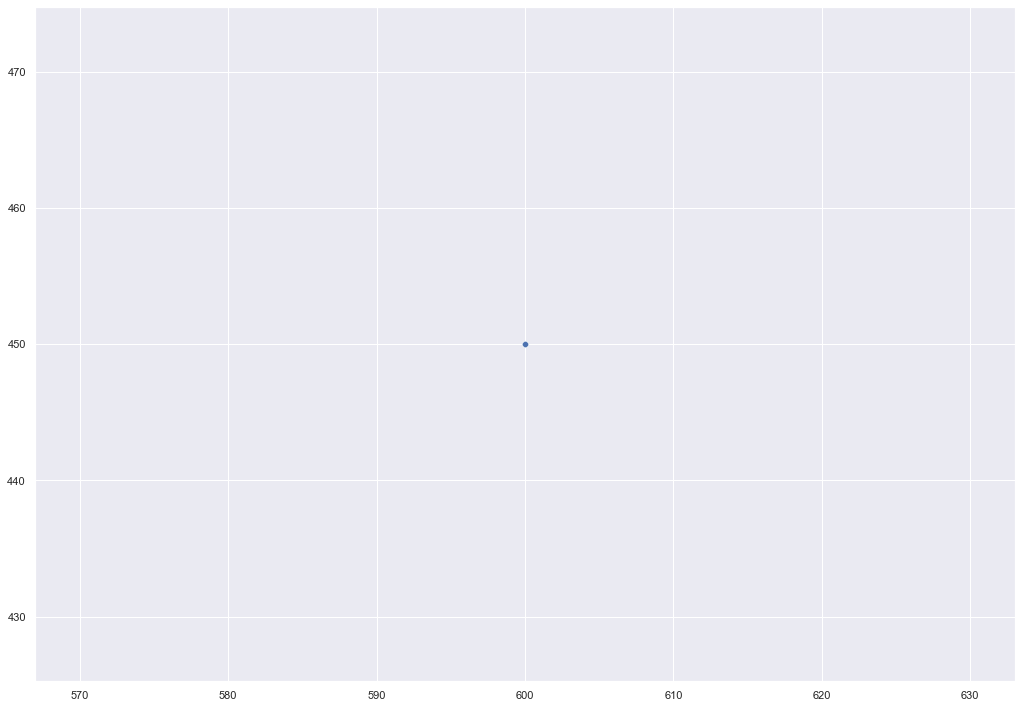

In [208]:
g = sns.scatterplot(x=ws, y=hs)
print(ws[0], hs[0])
# so all images are 600 x 450

In [209]:
#randomly sample several images to view

sds = ["./HAM10000/HAM10000_images_part_1/", "./HAM10000/HAM10000_images_part_2/"]
files = []
for sd in sds:
    for f in tqdm(os.listdir(sd)):
        files.append(sd + f)


100%|██████████| 5015/5015 [00:00<00:00, 2526355.34it/s]


In [210]:
sample_num = 10 
samples = []
for i in range(sample_num):
    samples.append(int(random()*len(files)))
for i in range(len(samples)):
    samples[i] = files[samples[i]]

In [ ]:
for file in samples:
    im = Image.open(file)
    im.show()

-Look at the ways in which people are evaluating unbalanced datasets
just change the evaluation metric to fit the problem you are trying to solve 

In [212]:
#evaluate the size of the white regions (which are the regions of interest/diseased regions) by randomly selecting 100 samples 
dir = "HAM10000/HAM10000_segmentations_lesion_tschandl/"
i = 0 
files = []
for f in tqdm(os.listdir(dir)):
       files.append(dir+f)
#select 100 random files 
rfs = []
for i in range(100):
       rfs.append(files[int(random()*len(files))])
sizes = []
for f in tqdm(rfs):
       img = cv.imread(f)
       sizes.append(find_region_size(img))

100%|██████████| 100/100 [01:38<00:00,  1.01it/s]


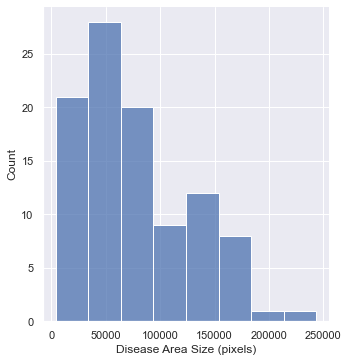

In [213]:
g = sns.displot(data=sizes)
g.set_axis_labels("Disease Area Size (pixels)", "Count")


In [214]:
def find_region_size(img):
    #start in the middle of the image (x, y)
    point = (300, 225)
    #if point is not white, traverse the image until the first while pixel is found
    if not all(img[point[1], point[0]] == [255, 255, 255]):
        for x in range(0, 600):
            for y in range(0, 450):
                if all(img[y, x] == [255, 255, 255]):
                    point = (x, y)
                    break 
    #just bfs around while the pixels are still white
    queue = []
    queue.append(point)
    visited = set()
    while(len(queue) > 0 ):
        #visit pixel if it is unvisted, and add neighbors 
        pixel = queue.pop(0)
        if pixel not in visited:
            x_n = [-1,0,1]
            y_n = [-1,0,1]
            #visit all the neighbors and add them to the queue
            for xn in x_n:
                for yn in y_n:
                    npixel = (pixel[0] + xn, pixel[1] + yn)
                    #if it is not visited and white and within the bounds of the image
                    #img[y,x]
                    if npixel not in visited  and 0 <= npixel[0] < 600 and 0 <= npixel[1] < 450 and all(img[npixel[1], npixel[0]] == [255, 255, 255]):
                        queue.append(npixel)
        visited.add(pixel)
    return len(visited)

In [215]:
#disease area size by diagnosis/dx type  
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
dxs = df["dx"].unique()

ldxs = {}
sizes = []

In [217]:
#get 20 samples for each dx type
for dx, group in df.groupby("dx"):
    ldxs[dx] = []
    images = list(group["image_id"])
    np.random.shuffle(images)
    for i in range(20):
        ldxs[dx].append(images[i])

In [218]:
#find the size of each of these
dxs = []
sizes = []
for dx in ldxs:
    for f in tqdm(ldxs[dx]):
        img = cv.imread(dir + f+"_segmentation.png")
        sizes.append(find_region_size(img))
        dxs.append(dx)

100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


[Text(0.5, 0, 'Disease'), Text(0, 0.5, 'Area Size (pixels)')]

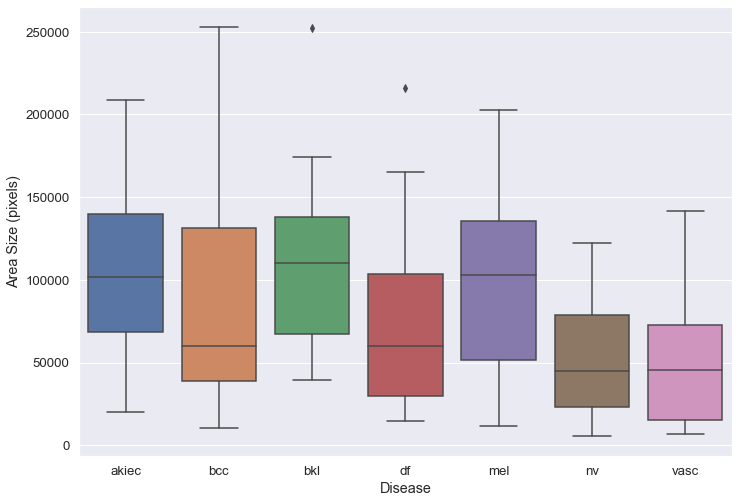

In [219]:
ndf = pd.DataFrame()
ndf["dx"] = dxs
ndf["sizes"] = sizes
sns.set(font_scale=1.2, rc={'figure.figsize':(11.7,8.27)})
g = sns.boxplot(x="dx", y="sizes", data=ndf)
g.set(xlabel="Disease", ylabel="Area Size (pixels)")




In [220]:
# do this same analysis by localization, to understand if different diseases are larger/smaller

lcs = {}
sizes = []

#get 20 samples for each image
for lc, group in df.groupby("localization"):
    lcs[lc] = []
    images = list(group["image_id"])
    np.random.shuffle(images)
    for i in range(20):
        if len(images) > 20: 
            lcs[lc].append(images[i])
locs = []
sizes = []
for lc in lcs:
    for f in tqdm(lcs[lc]):
        img = cv.imread(dir + f+"_segmentation.png")
        sizes.append(find_region_size(img))
        locs.append(lc)

100%|██████████| 20/20 [00:25<00:00,  1.25s/it]
0it [00:00, ?it/s]
100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


[Text(0.5, 0, 'Disease Localization'), Text(0, 0.5, 'Area Size (pixels)')]

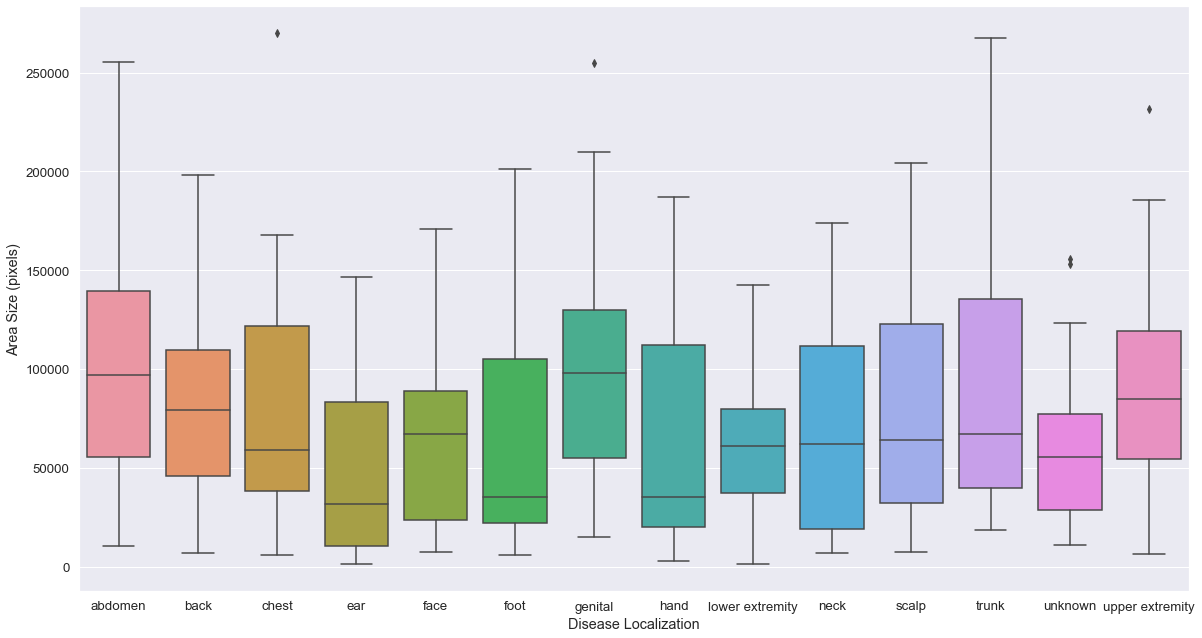

In [221]:
ndf = pd.DataFrame()
ndf["localization"] = locs
ndf["sizes"] = sizes
sns.set(font_scale=1.2, rc={'figure.figsize':(1.7*11.7,1.3*8.27)})
g = sns.boxplot(x="localization", y="sizes", data=ndf)
g.set(xlabel="Disease Localization", ylabel="Area Size (pixels)")




In [223]:
#how semantically related/different  are these disease/location labels 
from sentence_transformers import SentenceTransformer
import sklearn
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

In [229]:
# get all the different locations
locations = df["localization"].unique()
# disease_map = {
#     "akiec": "Actinic Keratoses and Intraepithelial Carcinoma", 
#     "bcc": "Basal cell carcinoma", 
#     "bkl": "Benign keratosis", 
#     "df": "Dermatofibroma", 
#     "nv": "Melanocytic nevi", 
#     "mel": "Melanoma", 
#     "vasc": "Vascular skin lesions"
# }

In [230]:
#make embeddings for them 
l_encoding = {}
for l in locations:
    l_encoding[l] = model.encode(l)

In [233]:
# run PCA and condense down these embeddings to 3d 
ndf = pd.DataFrame()
for l in l_encoding:
    ndfn = pd.DataFrame(l_encoding[l])
    ndfn = ndfn.T
    ndf  = ndf.append(ndfn)

#transform 
ndf = StandardScaler().fit_transform(ndf)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(ndf)
ndf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])
#ndf
ndf["locations"] = list(l_encoding.keys())
ndf

,pc1,pc2,pc3,locations
0,-13.835149,-2.603312,2.259849,scalp
1,-3.920452,-3.435947,6.361957,ear
2,-4.312849,-16.087454,11.149613,face
3,-3.661015,-5.676224,-4.567707,back
4,-1.400513,6.650923,9.130507,trunk
5,9.066568,0.291162,18.360497,chest
6,21.076591,6.241405,-7.199512,upper extremity
7,3.830852,21.705761,8.610315,abdomen
8,-16.706150,-6.201650,-14.844983,unknown
9,21.009115,5.637387,-13.990552,lower extremity


In [238]:
#plot figure in 2d
fig = px.scatter(ndf, x="pc1", y="pc2",color='locations', opacity=1, hover_data={"pc1":False, "pc2":False})
fig.show()